<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2025/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install pyradiomics


In [2]:
import radiomics
from radiomics import featureextractor
import matplotlib.pyplot as plt
import SimpleITK as sitk
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# First define the settings
settings = {}
settings['binWidth'] = 20
settings['sigma'] = [1]
settings['normalize']=True
settings['geometryTolerance']=1
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)  # ** 'unpacks' the dictionary in the function call
# Enable a filter (in addition to the 'Original' filter already enabled)
#extractor.enableImageTypeByName('LoG')
#extractor.enableImageTypeByName('Wavelet')
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('firstorder')
extractor.enableFeatureClassByName('shape')
extractor.enableFeatureClassByName('glcm')
extractor.enabledFeatures
print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Applying custom setting overrides: {'binWidth': 20, 'sigma': [1], 'normalize': True, 'geometryTolerance': 1}


Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': True, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1], 'geometryTolerance': 1}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'shape': [], 'glcm': []}


In [4]:
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('firstorder')
extractor.enableFeatureClassByName('shape')
extractor.enableFeatureClassByName('glcm')
extractor.enabledFeatures

{'firstorder': [], 'shape': [], 'glcm': []}

In [5]:
h1 = nib.load('H_t1ce.nii.gz')
img = h1.get_fdata()
img.shape

(240, 240, 155)

In [6]:
h2 = nib.load('H_seg.nii.gz')
seg = h2.get_fdata()
seg.shape

(240, 240, 155)

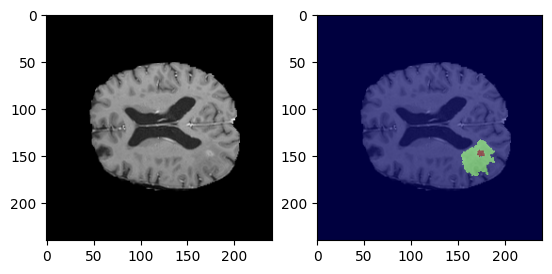

In [7]:
zn=85
plt.subplot(121)
plt.imshow(img[:,:,zn],cmap='gray')
plt.subplot(122)
plt.imshow(img[:,:,zn],cmap='gray')
plt.imshow(seg[:,:,zn],cmap='jet',alpha=.5)
plt.show()

In [8]:
image = sitk.GetImageFromArray(img)
mask = sitk.GetImageFromArray(seg)

In [9]:
features = extractor.execute(image,mask)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [10]:
feature_names = list((filter(lambda k: k.startswith("original_"),features)))

In [11]:
df1 = pd.DataFrame()
for j in range(len(feature_names)):
  print(j,feature_names[j],features[feature_names[j]])
  new_row = {"feature_name":feature_names[j], "H":features[feature_names[j]]}
  df1 = pd.concat([df1, pd.DataFrame([new_row])], ignore_index=True)

0 original_shape_Elongation 0.7705221899156938
1 original_shape_Flatness 0.4456204321340164
2 original_shape_LeastAxisLength 8.942992981667214
3 original_shape_MajorAxisLength 20.068633161276786
4 original_shape_Maximum2DDiameterColumn 25.553864678361276
5 original_shape_Maximum2DDiameterRow 20.0
6 original_shape_Maximum2DDiameterSlice 21.840329667841555
7 original_shape_Maximum3DDiameter 27.910571473905726
8 original_shape_MeshVolume 339.4583333333333
9 original_shape_MinorAxisLength 15.463327172041701
10 original_shape_Sphericity 0.3280588293045878
11 original_shape_SurfaceArea 717.3372388711193
12 original_shape_SurfaceVolumeRatio 2.113181997410932
13 original_shape_VoxelVolume 413.0
14 original_firstorder_10Percentile 1.7756253364023524
15 original_firstorder_90Percentile 2.8247011799850297
16 original_firstorder_Energy 2380.4530635283995
17 original_firstorder_Entropy -3.203426503814917e-16
18 original_firstorder_InterquartileRange 0.5057083553680597
19 original_firstorder_Kurtosi

In [12]:
df1

,feature_name,H
0,original_shape_Elongation,0.770522
1,original_shape_Flatness,0.44562
2,original_shape_LeastAxisLength,8.942993
3,original_shape_MajorAxisLength,20.068633
4,original_shape_Maximum2DDiameterColumn,25.553864678361276
5,original_shape_Maximum2DDiameterRow,20.0
6,original_shape_Maximum2DDiameterSlice,21.840329667841555
7,original_shape_Maximum3DDiameter,27.910571473905726
8,original_shape_MeshVolume,339.4583333333333
9,original_shape_MinorAxisLength,15.463327


In [13]:
df1.to_csv("H_features.csv")